### Score: 25

Q1.[8]

Q2.[9+8]

C:\dev\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\dev\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


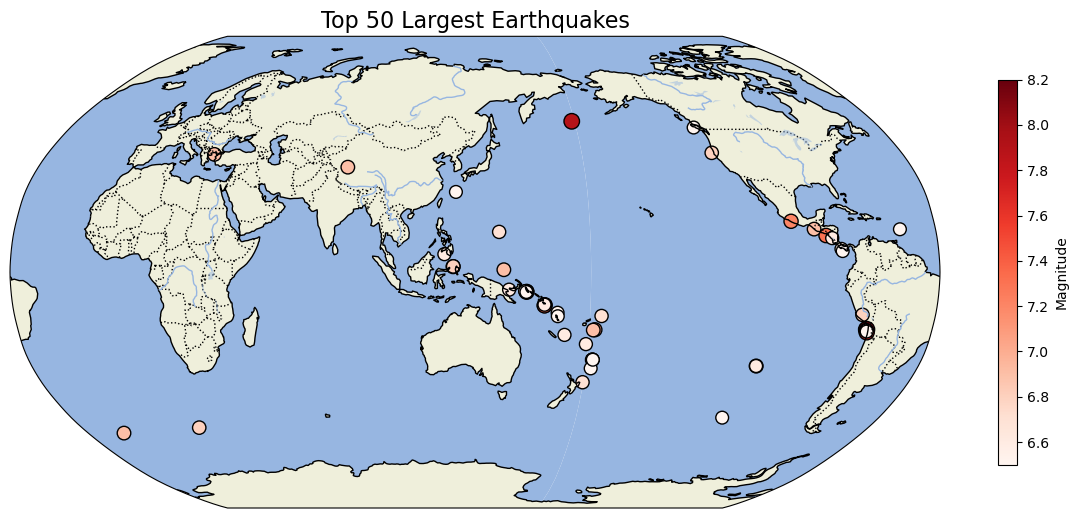

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 加载地震数据
df = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\usgs_earthquakes.csv')

# 筛选出震级最大的50个地震
top_50_earthquakes = df.nlargest(50, 'mag')

# 创建绘图
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(central_longitude=135)})
ax.set_global()

# 添加高分辨率的自然地理特征和蓝色海洋
ax.add_feature(cfeature.LAND, zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# 获取地震数据的纬度、经度和震级
lats = top_50_earthquakes['latitude'].values
lons = top_50_earthquakes['longitude'].values
mags = top_50_earthquakes['mag'].values

# 根据震级绘制地震位置
sc = ax.scatter(lons, lats, c=mags, cmap='Reds', alpha=1, edgecolors='k', s=(mags**2)*2, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(sc, orientation='vertical', shrink=0.5, ax=ax, pad=0.05)
cbar.set_label('Magnitude')

# 设置标题和标签
ax.set_title('Top 50 Largest Earthquakes', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

# NOTE: 底图和投影中心应与例图一致 -2
plt.show()


In [106]:
#2
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import contextily as ctx
import os
import xarray as xr
import matplotlib.lines as mlines

# 设置文件夹路径
folder_path = 'd:\\Microsoft VS Code\\PS3'

# 创建一个空的列表来存储DataArray对象
data_arrays = []

# 遍历文件夹中的每个NC4文件
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    # 确保只处理文件，忽略文件夹
    if os.path.isfile(file_path) and file_name.endswith('.nc4'):
        # 使用xarray打开每个NC4文件并添加到列表中
        ds = xr.open_dataset(file_path)
        data_arrays.append(ds)



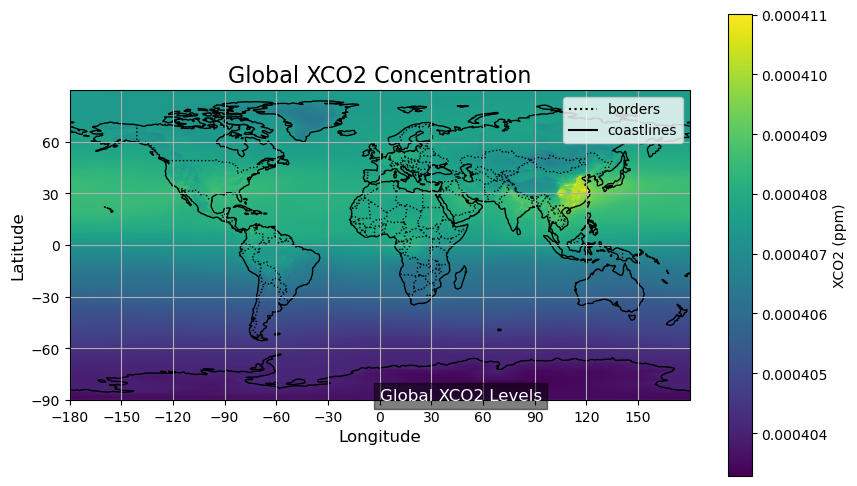

In [107]:
#2.1
# 将所有DataArray对象合并成一个Dataset对象
ds = xr.concat(data_arrays, dim='time')
xco2 = ds['XCO2']

# 获取纬度和经度（根据你的数据变量名称进行调整）
lat = ds['lat']
lon = ds['lon']

# 创建图形
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制全球XCO2地图
c = ax.pcolormesh(lon, lat, xco2.mean(dim='time'), cmap='viridis', shading='auto')

# 添加特征和掩码
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, zorder=0)


# 设置标题、轴标签和网格线
ax.set_title('Global XCO2 Concentration', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xticks(range(int(lon.min()), int(lon.max()), 30))
ax.set_yticks(range(int(lat.min()), int(lat.max()), 30))
ax.grid(True)

# 添加colorbar
fig.colorbar(c, ax=ax, orientation='vertical', label='XCO2 (ppm)')

# 添加文本框
ax.text(0, -90, 'Global XCO2 Levels', fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))


# 添加图例说明
borders_line = mlines.Line2D([], [], color='black', linestyle=':', label='borders')
coastlines_line = mlines.Line2D([], [], color='black', linestyle='-', label='coastlines')
ax.legend(handles=[borders_line, coastlines_line], loc='upper right')
# NOTE: 缺少注释 -1
plt.show()



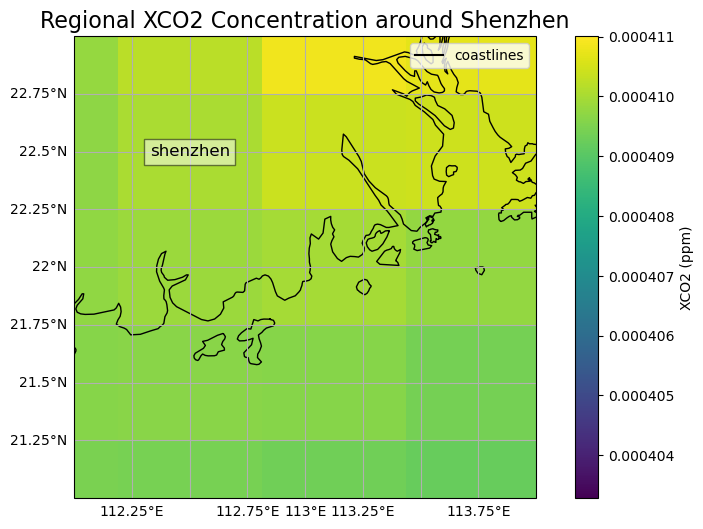

In [108]:

# 将所有DataArray对象合并成一个Dataset对象
ds = xr.concat(data_arrays, dim='time')
xco2 = ds['XCO2']

# 获取纬度和经度（根据你的数据变量名称进行调整）
lat = ds['lat']
lon = ds['lon']

# 定义深圳及周边方圆1度的范围
extent = [112, 114, 21, 23]  # [xmin, xmax, ymin, ymax]

# 创建图形
# NOTE: 应使用与2.1不同的投影方式 -1
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置地图的显示范围
ax.set_extent(extent, crs=ccrs.PlateCarree())

# 绘制区域XCO2地图
c = ax.pcolormesh(lon, lat, xco2.mean(dim='time'), cmap='viridis', shading='auto', transform=ccrs.PlateCarree())

# 添加海岸线
ax.coastlines()

# 设置标题、轴标签和网格线
ax.set_title('Regional XCO2 Concentration around Shenzhen', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# 添加颜色条
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='XCO2 (ppm)')

# 添加文本框  
ax.text(0.25, 0.75, 'shenzhen', transform=ax.transAxes, fontsize=12,
        verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

# 添加图例说明
coastlines_line = mlines.Line2D([], [], color='black', linestyle='-', label='coastlines')
ax.legend(handles=[coastlines_line], loc='upper right')

# NOTE: 缺少注释 -1
plt.show()

